In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_context('talk')
mpl.rcParams['figure.figsize'] = [12,6]

In [2]:
## read in the Data/student/student-mat.csv (it uses ";" as the sep)
df = pd.read_csv('Data/data.csv')
# display info and .head
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [19]:
mean = df['VitD_levels'].mean()
median = df['VitD_levels'].median()
std = df['VitD_levels'].std()
plus_one_std = mean + std
minus_one_std = mean - std


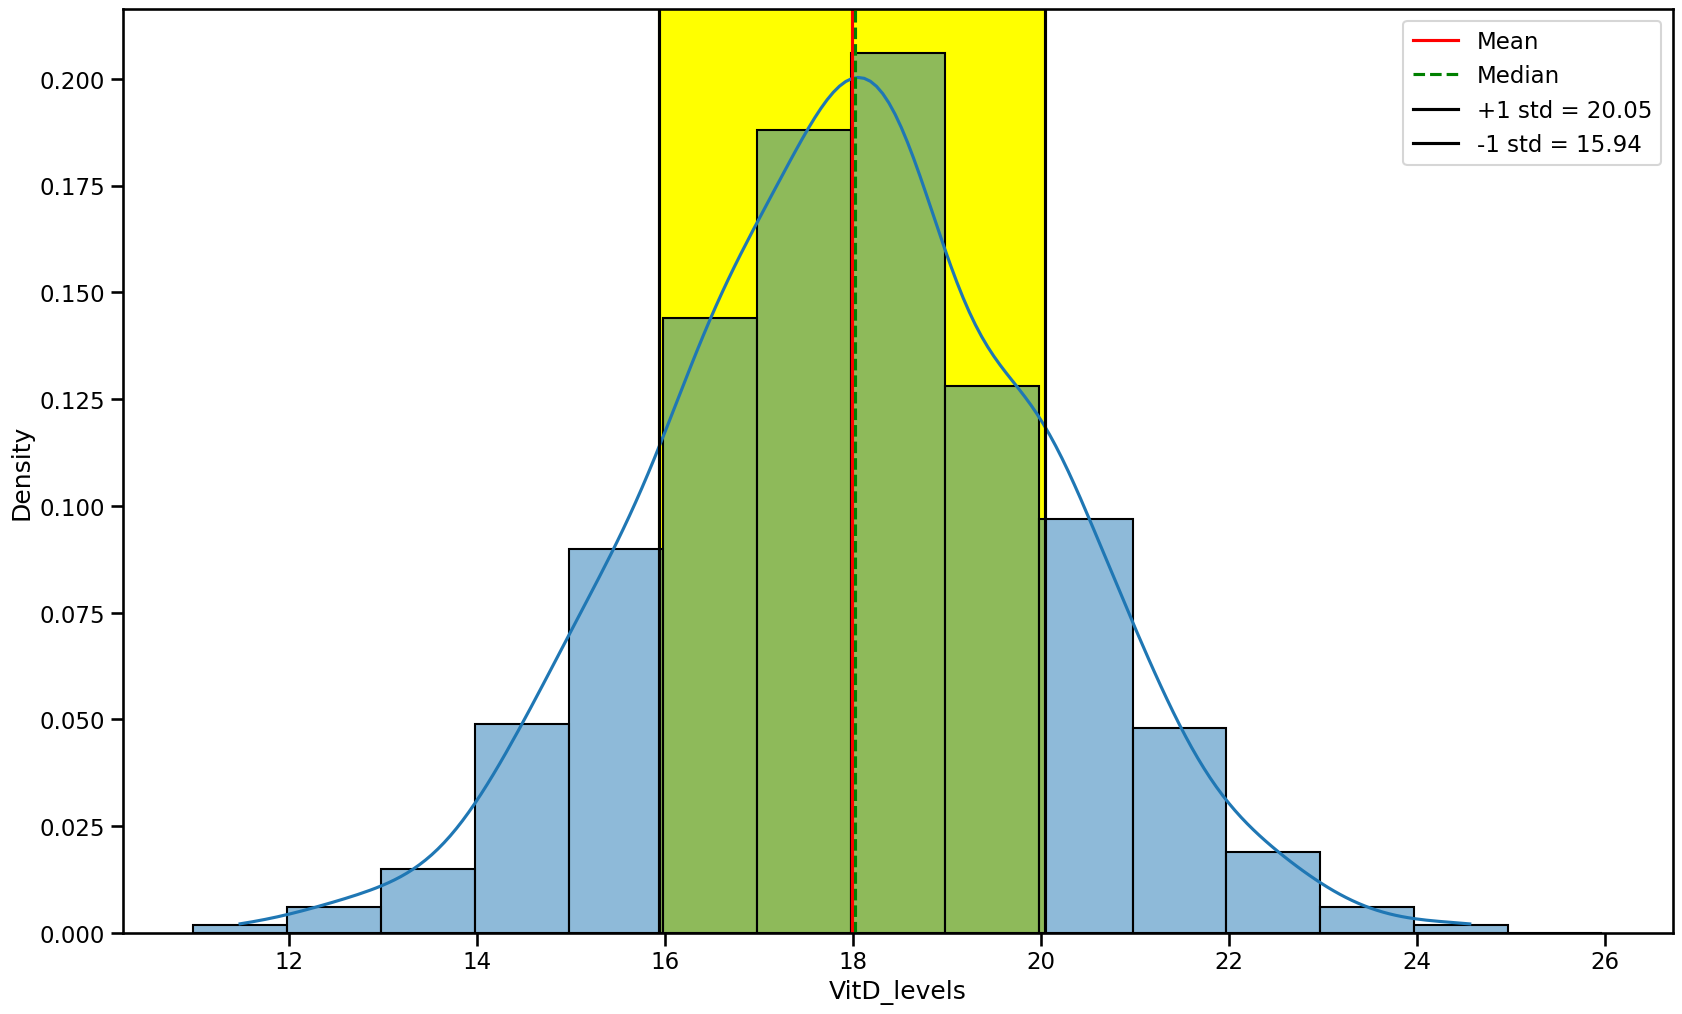

In [29]:
fig, ax = plt.subplots(figsize=(20,12))
sns.histplot(data=df, x='VitD_levels', 
             discrete=True, 
             stat='density', 
             kde=True);

ax.axvline(mean, color='red', label='Mean')
ax.axvline(median, ls='--', color='green', label='Median')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder=0)
ax.legend();

VitD_levels are continuous and can be represented by float numbers. There is no skew and the mean and median seem to be right on top of each other. 

In [30]:
mean = df['Doc_visits'].mean()
median = df['Doc_visits'].median()
std = df['Doc_visits'].std()
plus_one_std = mean + std
minus_one_std = mean - std


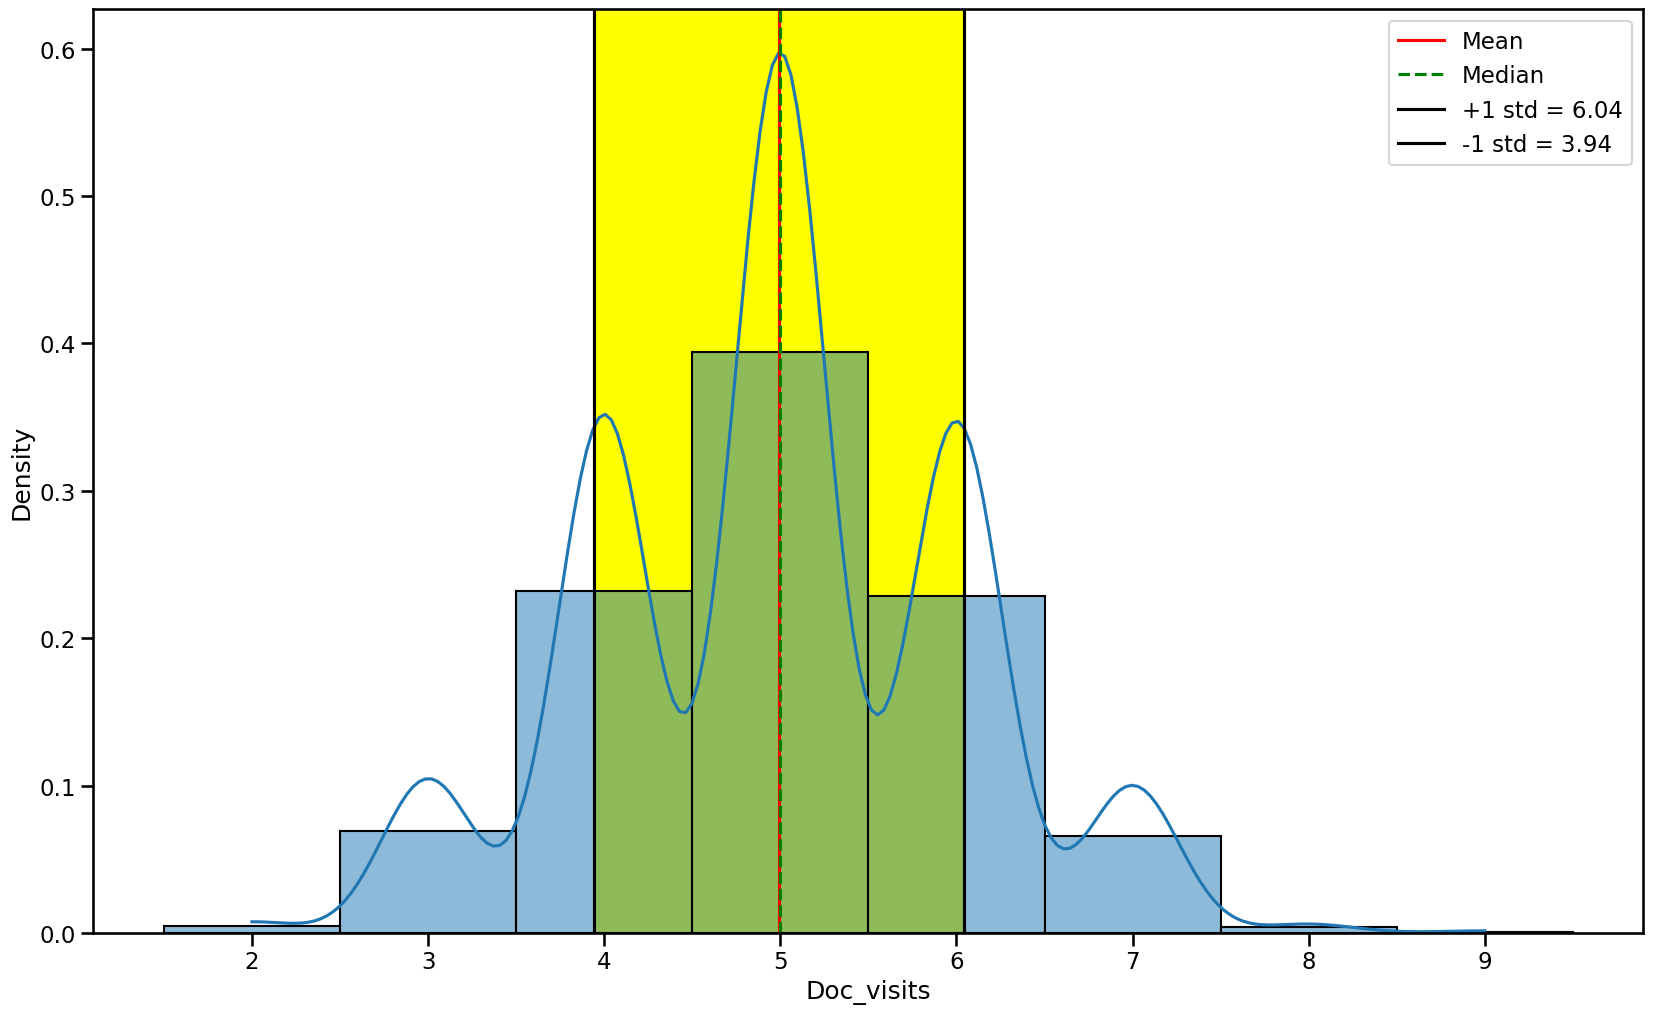

In [31]:
fig, ax = plt.subplots(figsize=(20,12))
sns.histplot(data=df, x='Doc_visits', 
             discrete=True, 
             stat='density', 
             kde=True);

ax.axvline(mean, color='red', label='Mean')
ax.axvline(median, ls='--', color='green', label='Median')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder=0)
ax.legend();

Doc_visits is a feature that is discrete. Doctor visits can be counted and be represented by integers. It has no skew, it can be seen that the mean and median are the same. 

In [42]:
mean = df['TotalCharge'].mean()
median = df['TotalCharge'].median()
mode = df['TotalCharge'].mode()
std = df['TotalCharge'].std()
plus_one_std = mean + std
minus_one_std = mean - std

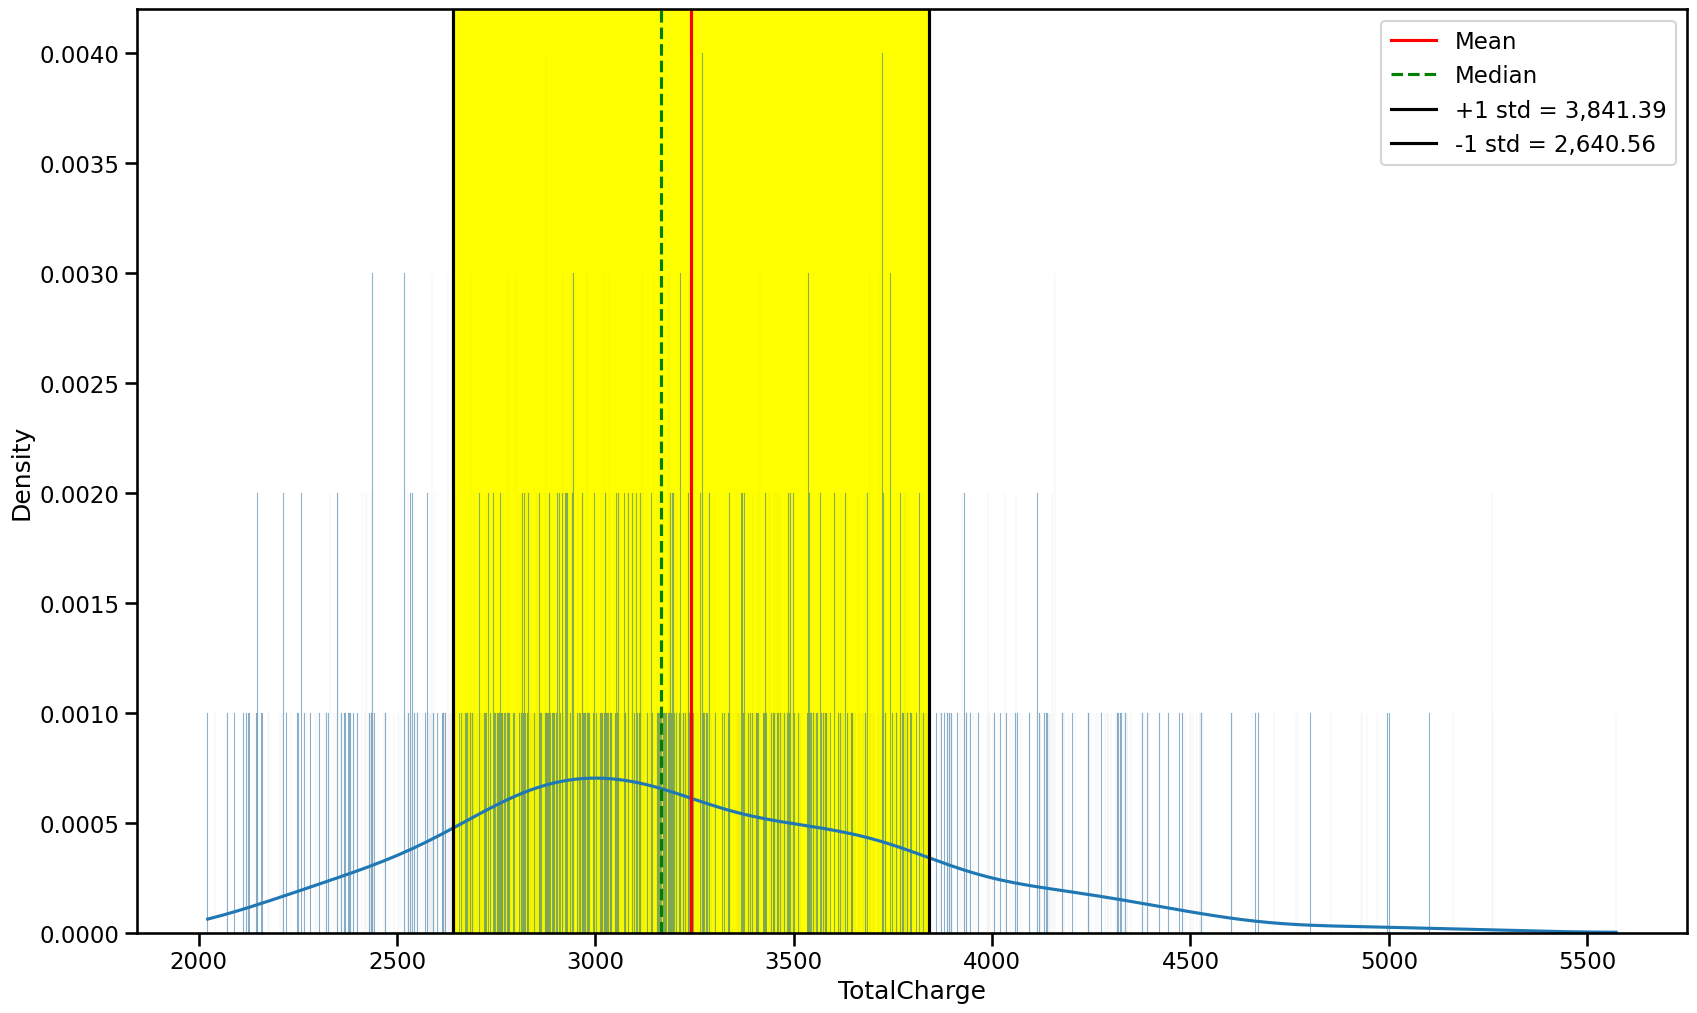

In [44]:
fig, ax = plt.subplots(figsize=(20,12))
sns.histplot(data=df, x='TotalCharge', 
             discrete=True, 
             stat='density', 
             kde=True);

ax.axvline(mean, color='red', label='Mean')
ax.axvline(median, ls='--', color='green', label='Median')
ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder=0)
ax.legend();

The distribution for TotalCharge is continuous. and it has a a positive skew. It can be seen since the median is smaller than the mean. 

In [38]:
from scipy import stats
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
                                                                                                        
kurt

3.013147515833447

In [39]:
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
                                                                                                        
kurt

2.9919958083381206

In [40]:
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
                                                                                                      
kurt

3.2650077463439384

From the values for kurt gained above the Vitd_levels feature is mesokurtic since the kurt value is 3.013 which is approx 3. The same can be said for the Doc_visits feature since it has a kurt value of 2.99 it is approx 3 which makes it mesokurtic. Finally the kurt value of TotalCharge is 3.265 which would make it leptokuric. However the kde looks flat and could be interpreted as a 'negative' platykuric. 
